In [1]:
#Question 1

A = [1,2,3,4,5,6] 
B = [13, 21, 34]
A_B = A + B #this combines the values of list A with list B to give a new list A_B
A_B

[1, 2, 3, 4, 5, 6, 13, 21, 34]

In [2]:
#Question 2
#creating an identity matrix in python, first import numpy 

import numpy as np
np.identity(3) #this line of code gives a three by three identity matrix

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [3]:
#first import pandas, then read the fuel data.

import pandas as pd
df = pd.read_csvdf = pd.read_csv('C:/Users/User/Documents/Datascience Hamoye/fuel_ferc1.csv')
df.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [4]:
#Question 3
#Which of the following fuel type code has the lowest average fuel cost per unit burned?

df.groupby('fuel_type_code_pudl')['fuel_cost_per_unit_burned'].sum() 
#Waste fuel type has the lowest average fuel cost per unit burned apart from other fuel types not mentioned that 
#also has a low average fuel cost per unit burned.

fuel_type_code_pudl
coal        576254.381
gas         156891.829
nuclear    4053318.428
oil        1361824.819
other         3048.394
waste         8607.492
Name: fuel_cost_per_unit_burned, dtype: float64

In [5]:
#Question 4
#What is the standard deviation and 75th percentile of the measure of energy per unit (Fuel_mmbtu_per_unit) 
#in two decimal places?

df['fuel_mmbtu_per_unit'].describe(include = 'all')
#the output below shows that the standard deviation and 75th percentile in two decimal places is 10.60 and 17.01 respectively

count    29523.000000
mean         8.492111
std         10.600220
min          0.000001
25%          1.024000
50%          5.762694
75%         17.006000
max        341.260000
Name: fuel_mmbtu_per_unit, dtype: float64

In [6]:
#Question 5
#What is the skewness and kurtosis for the fuel quantity burned in two decimal places?

#to determine the skewness and kurtosis, first we import the modules from scipy.stats

from scipy.stats import kurtosis, skew
print("Skweness for fuel quantity burned is {}".format(round(skew(df['fuel_qty_burned']), 2)))
print("Kurtosis for the fuel quantity burned is {}".format(round(kurtosis(df['fuel_qty_burned']),2)))

Skweness for fuel quantity burned is 15.85
Kurtosis for the fuel quantity burned is 651.26


In [7]:
#Question 6
#Which feature has missing values and what is the total number of missing value and 
#percentage of the missing rows as a factor of the total number of rows in three decimal places? 
#(Enter answer in the format: Feature: xxx, Total: xxx, Percent: xxx)

df.isnull().sum()
df['fuel_unit'].isnull().sum()
len(df)
percent_missing_rows = round((df['fuel_unit'].isnull().sum()/ len(df))*100, 3)
print("percentage of the missing rows as a factor of the total number of rows is {}".format(percent_missing_rows))

percentage of the missing rows as a factor of the total number of rows is 0.61


In [8]:
#Question 7
#The feature with missing values falls under what category? What missing value imputation technique would you use?

df.isnull().sum()
#the missing value is a categorical feature and as such mode technique is used to determine missing values

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

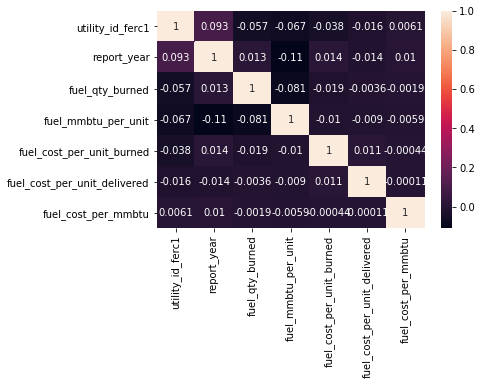

In [9]:
#Question 8
#Which of the features has the second and third lowest correlation with the Fuel Cost Per Unit Burned?

import seaborn as sns
sns.heatmap(df.corr(), annot = True)
#by inspecting the output, the features that has the second and third lowest correlation with the fuel cost per unit burned are
#fuel_qty_burned and fuel_mmbtu_per_unit.

In [10]:
#Question 9
#For the fuel type coal, what is the percentage change in the fuel cost per unit burned in 1998 compared to 1994?

new_df = df.groupby(['fuel_type_code_pudl', 'report_year'])['fuel_cost_per_unit_burned'].sum()
print(new_df)
percentage_change = ((new_df.iloc[4] - new_df.iloc[0])/new_df.iloc[4])*100
print("The percentage change in the fuel cost per unit burned in 1998 compared to 1994 is {}".format(percentage_change))

fuel_type_code_pudl  report_year
coal                 1994           14984.572
                     1995           14571.785
                     1996           12694.803
                     1997           43742.178
                     1998           11902.597
                                      ...    
waste                2014             591.594
                     2015             629.270
                     2016             539.079
                     2017             452.079
                     2018             660.972
Name: fuel_cost_per_unit_burned, Length: 148, dtype: float64
The percentage change in the fuel cost per unit burned in 1998 compared to 1994 is -25.89329874816391


<IPython.core.display.Javascript object>


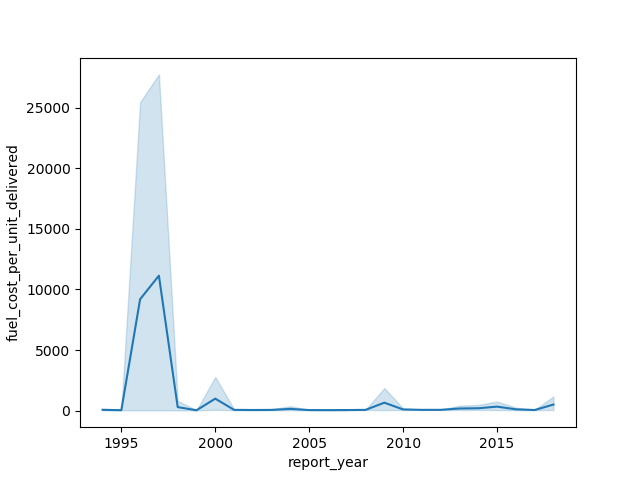

In [11]:
#Question 10
#Which year has the highest average fuel cost per unit delivered?

%matplotlib notebook
sns.lineplot(x= 'report_year', y= 'fuel_cost_per_unit_delivered', data = df)

#from the plot below, In 1997 we had the highest fuel cost per unit delivered.